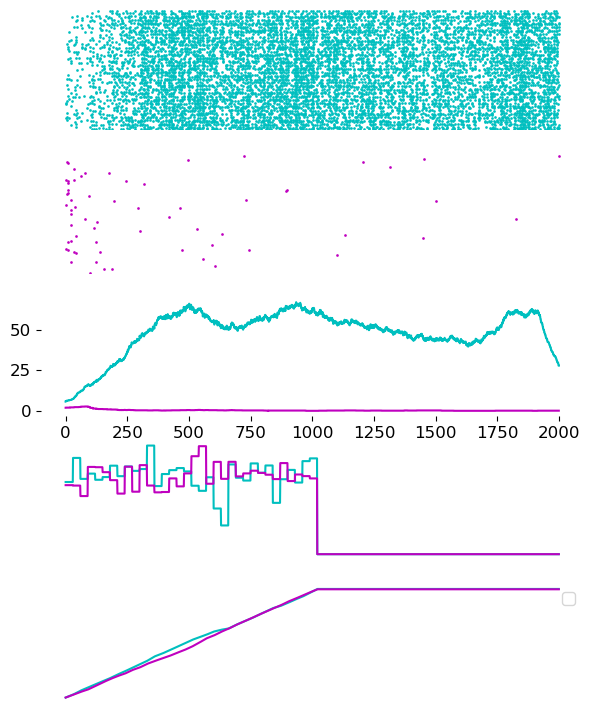

In [22]:
# Let's make a function that generates the figure 3 for each simulation

import brian2 as b2
from brian2 import NeuronGroup, Synapses, PoissonInput, PoissonGroup, network_operation
from brian2.monitors import StateMonitor, SpikeMonitor, PopulationRateMonitor
from random import sample
import numpy.random as rnd
from neurodynex3.tools import plot_tools
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import time



"""
it takes the result of simulation of decision making process and drow a plot

"""
rate_A_bins = results['stim_info_a']
rate_B_bins = results['stim_info_b']
#t_max = len(rate_A_bins)/10



start_time = 0
dt = 30 
total_stim_A = np.zeros(2000)
total_stim_B = np.zeros(2000)

for i in range(len(rate_A_bins)):
    total_stim_A[start_time+dt*i:start_time+dt*(i+1)] = rate_A_bins[i]
    total_stim_B[start_time+dt*i:start_time+dt*(i+1)] = rate_B_bins[i]




def time_integral(stim_info):
    #ti = sum(stim_info[0:time])
    time_integral = []
    for i in range(len(stim_info)):
        time_integral.append(sum(stim_info[0:i]))


    return time_integral

ti_A = time_integral(total_stim_A)
ti_B = time_integral(total_stim_B)


def get_spike_train_ts_indices(spike_train, t_max):
    """
    Helper. Extracts the spikes within the time window from the spike train
    """

    t_min = 0
    #t_max = 2000

    ts = spike_train/b2.ms
    # spike_within_time_window = (ts >= t_min) & (ts <= t_max)
    # idx_spikes = numpy.where(spike_within_time_window)
    idx_spikes = (ts >= t_min) & (ts <= t_max)
    ts_spikes = ts[idx_spikes]
    return idx_spikes, ts_spikes



import numpy

plt.style.use('default')
plt.rcParams['figure.figsize'] = (7, 9)
plt.rcParams['font.size'] = 12

fig, (ax_A, ax_B, rate_ax, stim_ax, ti_ax) = plt.subplots(5, 1)
spikemon_A = results["spike_monitor_A"]
spikemon_B = results["spike_monitor_B"]


all_spike_trains_A = spikemon_A.spike_trains()

neuron_counter = 0
spike_train_idx_list =numpy.arange(0,85)

for neuron_index in spike_train_idx_list:
    idx_spikes, ts_spikes = get_spike_train_ts_indices(all_spike_trains_A[neuron_index],t_max)
    ax_A.scatter(ts_spikes, neuron_counter * numpy.ones(ts_spikes.shape),
                      marker=".", c="c", s=15, lw=0)
    neuron_counter += 1
ax_A.set_ylim([0, neuron_counter])

#ax.spines['right'].set_visible(False)
ax_A.spines['top'].set_visible(False)        # 왼쪽 축을 가운데 위치로 이동
ax_A.spines['right'].set_visible(False)    
ax_A.spines['left'].set_visible(False)    
ax_A.spines['bottom'].set_visible(False)    


ax_A.get_xaxis().set_visible(False)
ax_A.get_yaxis().set_visible(False)

rate_excit_A =  results['rate_monitor_A']
rate_excit_B =  results['rate_monitor_B']
t_max = len(rate_excit_B)/10


all_spike_trains_B = spikemon_B.spike_trains()
neuron_counter = 0
for neuron_index in spike_train_idx_list:
    idx_spikes, ts_spikes = get_spike_train_ts_indices(all_spike_trains_B[neuron_index],t_max)
    ax_B.scatter(ts_spikes, neuron_counter * numpy.ones(ts_spikes.shape),
                      marker=".", c="m", s=15, lw=0)
    neuron_counter += 1
ax_B.set_ylim([0, neuron_counter])

#ax.spines['right'].set_visible(False)
ax_B.spines['top'].set_visible(False)        # 왼쪽 축을 가운데 위치로 이동
ax_B.spines['right'].set_visible(False)    
ax_B.spines['left'].set_visible(False)    
ax_B.spines['bottom'].set_visible(False)    


ax_B.get_xaxis().set_visible(False)
ax_B.get_yaxis().set_visible(False)


#########

rate_excit_A =  results['rate_monitor_A']
rate_excit_B =  results['rate_monitor_B']
rate_inhib =  results['rate_monitor_inhib']

#rate_monitor_0 =  results_0['rate_monitor_inhib']


window_width = 150.1 * b2.ms
(ax_rate) = plt.plot(figsize=(10,4))
t_max  = len(rate_excit_A)/10
t_min = 0 
ts = rate_excit_A.t / b2.ms
idx_rate = (ts >= t_min) & (ts <= t_max)
smoothed_rates_A = rate_excit_A.smooth_rate(window="flat", width=window_width)/b2.Hz
smoothed_rates_B = rate_excit_B.smooth_rate(window="flat", width=window_width)/b2.Hz
smoothed_rates_ihb = rate_inhib.smooth_rate(window="flat", width=window_width)/b2.Hz

rate_ax.plot(ts[idx_rate], smoothed_rates_A[idx_rate],'c')
rate_ax.plot(ts[idx_rate], smoothed_rates_B[idx_rate], 'm')
#rate_ax.plot(ts[idx_rate], smoothed_rates_ihb[idx_rate])

plt.xlabel('Time (ms)')
plt.ylabel('Averaged Firing Rate (spikes/s)')

labels= ["Left","Right", "Inhibitory"]

plt.legend(labels)


rate_ax.spines['top'].set_visible(False)        # 왼쪽 축을 가운데 위치로 이동
rate_ax.spines['right'].set_visible(False)    
rate_ax.spines['left'].set_visible(False)    
rate_ax.spines['bottom'].set_visible(False)   

#stim_ax.xlabel('Time (ms)')
#stim_ax.ylabel('Sample Stimulus')

#rate_ax.get_xaxis().set_visible(False)
#rate_ax.get_yaxis().set_visible(False)


###########---------------------Stimulation Information -----------------############
stim_ax.plot(total_stim_A,'c')
stim_ax.plot(total_stim_B,'m')

#stim_ax.xlabel('Time (ms)')
#stim_ax.ylabel('Sample Stimulus')
stim_ax.get_xaxis().set_visible(False)
stim_ax.get_yaxis().set_visible(False)

#ax.spines['right'].set_visible(False)
stim_ax.spines['top'].set_visible(False)        # 왼쪽 축을 가운데 위치로 이동
stim_ax.spines['right'].set_visible(False)    
stim_ax.spines['left'].set_visible(False)    
stim_ax.spines['bottom'].set_visible(False)   


############------- time integral------------ #######################

ti_ax.plot(ti_A,'c')
ti_ax.plot(ti_B,'m')

#stim_ax.xlabel('Time (ms)')
#stim_ax.ylabel('Sample Stimulus')
ti_ax.get_xaxis().set_visible(False)
ti_ax.get_yaxis().set_visible(False)

#ax.spines['right'].set_visible(False)
ti_ax.spines['top'].set_visible(False)        # 왼쪽 축을 가운데 위치로 이동
ti_ax.spines['right'].set_visible(False)    
ti_ax.spines['left'].set_visible(False)    
ti_ax.spines['bottom'].set_visible(False)   

In [59]:
len(rate_excit_A)

20000

In [40]:
smoothed_rateA[100]

3.820345790272811

In [53]:
len(smoothed_rateB)

20000

In [68]:
all_spike_trains_A[neuron_index]

array([ 90.3, 122.3]) * msecond

In [70]:
ts = all_spike_trains_A[neuron_index]/b2.ms

In [72]:
neuron_index

84

In [71]:
ts

array([ 90.3, 122.3])

In [24]:
import numpy
import brian2 as b2

rateA =  results['rate_monitor_A']
rateB =  results['rate_monitor_B'] 
avg_window_width=120.1*b2.ms  
rate_threshold=5.6*b2.Hz
    
    
    #find which pop wins at last

    #rateA = rate_monitors["rate_monitor_A"]
    #rateB = rate_monitors["rate_monitor_B"]

    #window_width = 100.1 * b2.ms
    #(ax_rate) = plt.plot(figsize=(5,5))
t_max  = len(rateB)/10
t_min = 0 
ts = rateA.t / b2.ms
#idx_rate = (ts >= t_min) & (ts <= t_max)


smoothed_rateA = rateA.smooth_rate(window="flat", width=avg_window_width)/b2.Hz
smoothed_rateB = rateB.smooth_rate(window="flat", width=avg_window_width)/b2.Hz

time_pass_thre_A = 0 
time_pass_thre_B = 0 

for i in range(len(ts)-1):
    
    if((smoothed_rateA[i+1] > rate_threshold/b2.Hz) and  (smoothed_rateA[i] <= rate_threshold/b2.Hz)):
        time_pass_thre_A = i 
    
    else:
        pass
    
    if((smoothed_rateB[i+1] > rate_threshold/b2.Hz) and  (smoothed_rateB[i] <= rate_threshold/b2.Hz)):
        time_pass_thre_B = i 
    
    
    
if (smoothed_rateB.max() < smoothed_rateA.max()):

    A_win = True
else:

    A_win = False


#get the firing rate differences between A and B

if A_win:
    rate_diff = smoothed_rateA - smoothed_rateB
    winner = 'A'


else:
    rate_diff = smoothed_rateB - smoothed_rateA
    winner = 'B'


# find the time when the divergen starts happening
threshold = rate_threshold/b2.Hz

above_thre = (rate_diff > threshold)
idx_over_threshold = numpy.where(above_thre==True)

decision_time = idx_over_threshold[0][0];

decision_time_in_ms = (decision_time/10)*b2.ms

if A_win:
    decision_time_A = decision_time_in_ms
    decision_time_B = 0*b2.ms

else:
    decision_time_A = 0*b2.ms
    decision_time_B = decision_time_in_ms




print(decision_time_A, decision_time_B)




28.1 ms 0. s


In [25]:
time_pass_thre_A

0

In [26]:
time_pass_thre_B

0

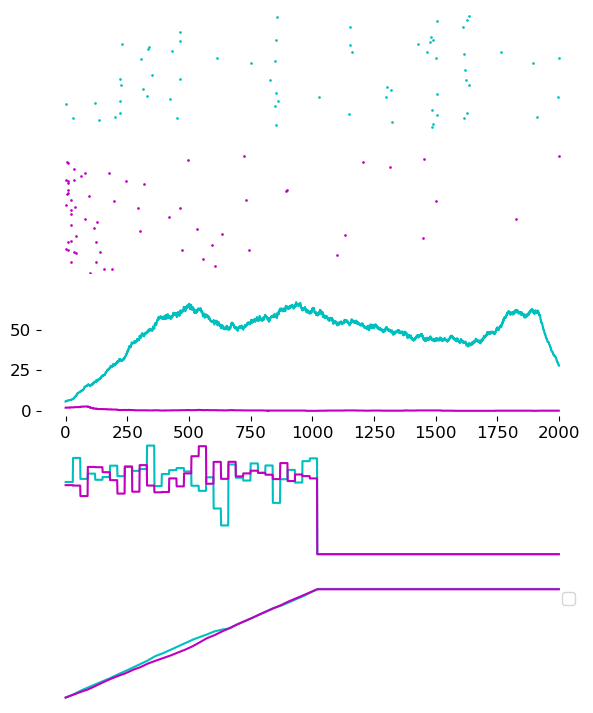

In [23]:
import plot_figure as pf

pf.figure3(results)

(<Figure size 1000x400 with 3 Axes>,
 <AxesSubplot:title={'center':'Raster Plot'}, ylabel='neuron #'>,
 <AxesSubplot:title={'center':'Population Activity'}, ylabel='A(t) [Hz]'>,
 <AxesSubplot:title={'center':'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

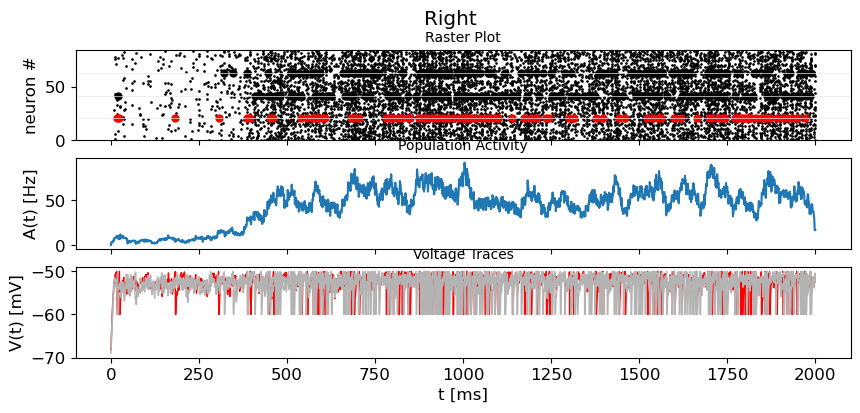

In [52]:
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                 sup_title="Right")

In [48]:
time_pass_thre_A

0

In [49]:
time_pass_thre_B

13684

In [50]:
len(ts)

20000

In [20]:
smoothed_rateB[100]

3.91830337463878

In [32]:
t_index_above_threshold_A = numpy.where(smoothed_rateB>15) 


In [36]:
np_array_timeA_above_thre = t_index_above_threshold_A[0]

In [38]:
len(np_array_timeA_above_thre)

16634

In [24]:
a.szie

AttributeError: 'tuple' object has no attribute 'szie'

stimulus start: 0.0, stimulus end: 1.0
simulating 426 neurons. Start: Fri Jun 10 16:56:11 2022


WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]
INFO       width adjusted from 20. ms to 20.1 ms [brian2.monitors.ratemonitor.adjusted_width]


sim end: Fri Jun 10 16:57:41 2022


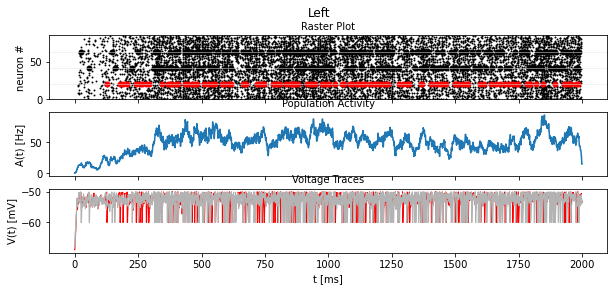

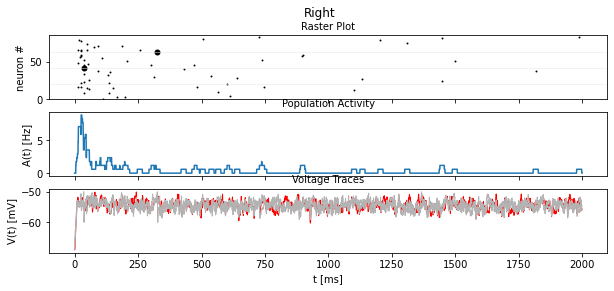

In [1]:
import wang

import brian2 as b2
from brian2 import NeuronGroup, Synapses, PoissonInput, PoissonGroup, network_operation
from brian2.monitors import StateMonitor, SpikeMonitor, PopulationRateMonitor
from random import sample
import numpy.random as rnd
from neurodynex3.tools import plot_tools
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import time

b2.defaultclock.dt = 0.10 * b2.ms

%matplotlib inline
#from neurodynex3.competing_populations import decision_making

"""
A simple example to get started.
Returns:

"""
stim_start = 0. * b2.ms
stim_duration = 1000 * b2.ms
print("stimulus start: {}, stimulus end: {}".format(stim_start, stim_start+stim_duration))

results = wang.sim_decision_making_network(N_Excit=341, N_Inhib=85, weight_scaling_factor=6.0,
                                      t_stimulus_start=stim_start, t_stimulus_duration=stim_duration,
                                      coherence_level=+0.0, w_pos=2.0, mu0_mean_stimulus_Hz=250 * b2.Hz,
                                      max_sim_time=2000. * b2.ms)
plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                 results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                 sup_title="Left")
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                 sup_title="Right")

plt.show()

In [4]:
import plot_figure as pf



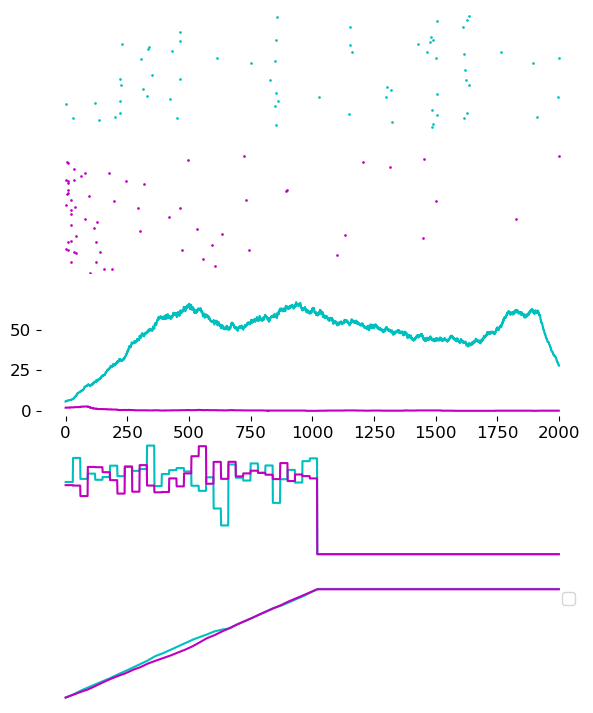

In [5]:
pf.figure3(results)

In [67]:
ts = spike_train/b2.ms

t_min = 0
t_max = 2000


# spike_within_time_window = (ts >= t_min) & (ts <= t_max)
# idx_spikes = numpy.where(spike_within_time_window)
idx_spikes = (ts >= t_min) & (ts <= t_max)
ts_spikes = ts[idx_spikes]
return idx_spikes, ts_spikes



NameError: name 'spike_train' is not defined

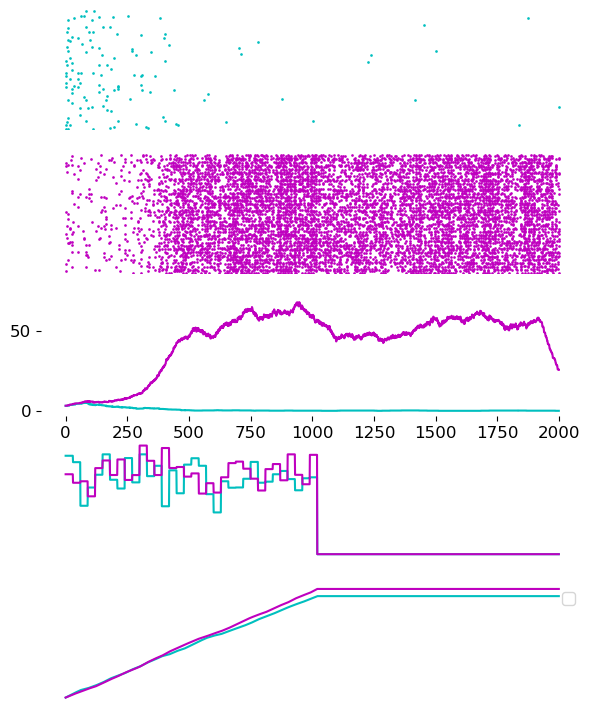

In [66]:
rate_A_bins = results['stim_info_a']
rate_B_bins = results['stim_info_b']



start_time = 0
dt = 30 
total_stim_A = np.zeros(2000)
total_stim_B = np.zeros(2000)

for i in range(40):
    total_stim_A[start_time+dt*i:start_time+dt*(i+1)] = rate_A_bins[i]
    total_stim_B[start_time+dt*i:start_time+dt*(i+1)] = rate_B_bins[i]
    
    
    
    
def time_integral(stim_info):
    #ti = sum(stim_info[0:time])
    time_integral = []
    for i in range(len(stim_info)):
        time_integral.append(sum(stim_info[0:i]))
        
    
    return time_integral

ti_A = time_integral(total_stim_A)
ti_B = time_integral(total_stim_B)


def get_spike_train_ts_indices(spike_train):
    """
    Helper. Extracts the spikes within the time window from the spike train
    """
    
    #t_min = 0
    #t_max = 2000
    
    ts = spike_train/b2.ms
    
    t_min = 0
    t_max = 2000
    
    
    # spike_within_time_window = (ts >= t_min) & (ts <= t_max)
    # idx_spikes = numpy.where(spike_within_time_window)
    idx_spikes = (ts >= t_min) & (ts <= t_max)
    ts_spikes = ts[idx_spikes]
    return idx_spikes, ts_spikes



import numpy

plt.style.use('default')
plt.rcParams['figure.figsize'] = (7, 9)
plt.rcParams['font.size'] = 12

fig, (ax_A, ax_B, rate_ax, stim_ax, ti_ax) = plt.subplots(5, 1)
spikemon_A = results["spike_monitor_A"]
spikemon_B = results["spike_monitor_B"]


all_spike_trains_A = spikemon_A.spike_trains()

neuron_counter = 0
spike_train_idx_list =numpy.arange(0,85)

for neuron_index in spike_train_idx_list:
    idx_spikes, ts_spikes = get_spike_train_ts_indices(all_spike_trains_A[neuron_index])
    ax_A.scatter(ts_spikes, neuron_counter * numpy.ones(ts_spikes.shape),
                      marker=".", c="c", s=15, lw=0)
    neuron_counter += 1
ax_A.set_ylim([0, neuron_counter])

#ax.spines['right'].set_visible(False)
ax_A.spines['top'].set_visible(False)        # 왼쪽 축을 가운데 위치로 이동
ax_A.spines['right'].set_visible(False)    
ax_A.spines['left'].set_visible(False)    
ax_A.spines['bottom'].set_visible(False)    


ax_A.get_xaxis().set_visible(False)
ax_A.get_yaxis().set_visible(False)


all_spike_trains_B = spikemon_B.spike_trains()
neuron_counter = 0
for neuron_index in spike_train_idx_list:
    idx_spikes, ts_spikes = get_spike_train_ts_indices(all_spike_trains_B[neuron_index])
    ax_B.scatter(ts_spikes, neuron_counter * numpy.ones(ts_spikes.shape),
                      marker=".", c="m", s=15, lw=0)
    neuron_counter += 1
ax_B.set_ylim([0, neuron_counter])

#ax.spines['right'].set_visible(False)
ax_B.spines['top'].set_visible(False)        # 왼쪽 축을 가운데 위치로 이동
ax_B.spines['right'].set_visible(False)    
ax_B.spines['left'].set_visible(False)    
ax_B.spines['bottom'].set_visible(False)    


ax_B.get_xaxis().set_visible(False)
ax_B.get_yaxis().set_visible(False)


#########

rate_excit_A =  results['rate_monitor_A']
rate_excit_B =  results['rate_monitor_B']
rate_inhib =  results['rate_monitor_inhib']

#rate_monitor_0 =  results_0['rate_monitor_inhib']


window_width = 150.1 * b2.ms
(ax_rate) = plt.plot(figsize=(10,4))
t_max  = len(rate_excit_A)
t_min = 0 
ts = rate_excit_A.t / b2.ms
idx_rate = (ts >= t_min) & (ts <= t_max)
smoothed_rates_A = rate_excit_A.smooth_rate(window="flat", width=window_width)/b2.Hz
smoothed_rates_B = rate_excit_B.smooth_rate(window="flat", width=window_width)/b2.Hz
smoothed_rates_ihb = rate_inhib.smooth_rate(window="flat", width=window_width)/b2.Hz

rate_ax.plot(ts[idx_rate], smoothed_rates_A[idx_rate],'c')
rate_ax.plot(ts[idx_rate], smoothed_rates_B[idx_rate], 'm')
#rate_ax.plot(ts[idx_rate], smoothed_rates_ihb[idx_rate])

plt.xlabel('Time (ms)')
plt.ylabel('Averaged Firing Rate (spikes/s)')

labels= ["Left","Right", "Inhibitory"]

plt.legend(labels)


rate_ax.spines['top'].set_visible(False)        # 왼쪽 축을 가운데 위치로 이동
rate_ax.spines['right'].set_visible(False)    
rate_ax.spines['left'].set_visible(False)    
rate_ax.spines['bottom'].set_visible(False)   

#stim_ax.xlabel('Time (ms)')
#stim_ax.ylabel('Sample Stimulus')

#rate_ax.get_xaxis().set_visible(False)
#rate_ax.get_yaxis().set_visible(False)


###########---------------------Stimulation Information -----------------############
stim_ax.plot(total_stim_A,'c')
stim_ax.plot(total_stim_B,'m')

#stim_ax.xlabel('Time (ms)')
#stim_ax.ylabel('Sample Stimulus')
stim_ax.get_xaxis().set_visible(False)
stim_ax.get_yaxis().set_visible(False)

#ax.spines['right'].set_visible(False)
stim_ax.spines['top'].set_visible(False)        # 왼쪽 축을 가운데 위치로 이동
stim_ax.spines['right'].set_visible(False)    
stim_ax.spines['left'].set_visible(False)    
stim_ax.spines['bottom'].set_visible(False)   


############------- time integral------------ #######################

ti_ax.plot(ti_A,'c')
ti_ax.plot(ti_B,'m')

#stim_ax.xlabel('Time (ms)')
#stim_ax.ylabel('Sample Stimulus')
ti_ax.get_xaxis().set_visible(False)
ti_ax.get_yaxis().set_visible(False)

#ax.spines['right'].set_visible(False)
ti_ax.spines['top'].set_visible(False)        # 왼쪽 축을 가운데 위치로 이동
ti_ax.spines['right'].set_visible(False)    
ti_ax.spines['left'].set_visible(False)    
ti_ax.spines['bottom'].set_visible(False)   

In [2]:
import decision_making

In [3]:
import wang

import brian2 as b2
from brian2 import NeuronGroup, Synapses, PoissonInput, PoissonGroup, network_operation
from brian2.monitors import StateMonitor, SpikeMonitor, PopulationRateMonitor
from random import sample
import numpy.random as rnd
from neurodynex3.tools import plot_tools
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import time

b2.defaultclock.dt = 0.10 * b2.ms

%matplotlib inline
#from neurodynex3.competing_populations import decision_making

"""
A simple example to get started.
Returns:

"""
stim_start = 0. * b2.ms
stim_duration = 1000 * b2.ms

In [4]:
results

{'rate_monitor_A': <PopulationRateMonitor, recording neurongroup_1>,
 'spike_monitor_A': <SpikeMonitor, recording from spikemonitor_1>,
 'voltage_monitor_A': <StateMonitor, recording ['v'] from neurongroup_1>,
 'idx_monitored_neurons_A': [60,
  37,
  52,
  8,
  5,
  58,
  45,
  66,
  31,
  56,
  10,
  22,
  39,
  48,
  55,
  15,
  53,
  34,
  75,
  0,
  18,
  44,
  77,
  84,
  42,
  1,
  27,
  64,
  68,
  6,
  72,
  35,
  63,
  14,
  23,
  61,
  76,
  20,
  46,
  3,
  33,
  57,
  81,
  38,
  80,
  78,
  82,
  26,
  29,
  32,
  62,
  73,
  13,
  50,
  21,
  43,
  4,
  36,
  54,
  79,
  74,
  41,
  16,
  7,
  2,
  24,
  30,
  65,
  51,
  71,
  25,
  12,
  69,
  19,
  11,
  83,
  49,
  59,
  47,
  70,
  67,
  17,
  28,
  40,
  9],
 'rate_monitor_B': <PopulationRateMonitor, recording neurongroup_2>,
 'spike_monitor_B': <SpikeMonitor, recording from spikemonitor_2>,
 'voltage_monitor_B': <StateMonitor, recording ['v'] from neurongroup_2>,
 'idx_monitored_neurons_B': [24,
  74,
  41,
  0,
  

In [17]:
import f_decision_time as f_dt


coherence_levels = [-0.1, -0.5]  # for negative values, B is the correct decision.
nr_repetitions = 1

time_to_A, time_to_B, count_A, count_B, count_No =\
decision_making.run_multiple_simulations(f_dt.get_decision_time,   coherence_levels, nr_repetitions, rate_threshold=10 * b2.Hz,)

********************************************
coherence_level=-0.1
i_run=0
simulating 480 neurons. Start: Fri Jun 10 10:02:29 2022
sim end: Fri Jun 10 10:03:00 2022
t_A=0.0, t_B=0.5016
decision: B
********************************************
coherence_level=-0.5
i_run=0
simulating 480 neurons. Start: Fri Jun 10 10:03:00 2022
sim end: Fri Jun 10 10:03:06 2022


IndexError: index 0 is out of bounds for axis 0 with size 0

In [16]:
import f_decision_time as f_dt


coherence_levels = [1.0]  # for negative values, B is the correct decision.
nr_repetitions = 1

time_to_A, time_to_B, count_A, count_B, count_No =\
decision_making.run_multiple_simulations(f_dt.get_decision_time,  coherence_levels, nr_repetitions)

********************************************
coherence_level=1.0
i_run=0
simulating 480 neurons. Start: Fri Jun 10 09:58:47 2022
sim end: Fri Jun 10 09:58:53 2022


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
time_to_A

In [17]:
time_to_B


array([[0.    ],
       [0.6234]])

In [18]:
count_A

array([1, 0], dtype=int8)

In [19]:
count_B

array([0, 1], dtype=int8)

In [20]:
count_No

array([0, 0], dtype=int8)

In [1]:
import f_decision_time as f_dt


coherence_levels = [0, 1]  # for negative values, B is the correct decision.
nr_repetitions = 1

time_to_A, time_to_B, count_A, count_B, count_No =\
decision_making.run_multiple_simulations(f_dt.get_decision_time, coherence_levels,  nr_repetitions)

NameError: name 'decision_making' is not defined

In [ ]:
import f_decision_time as f_dt


coherence_levels = [3.2, 6.4, 12.8, 25.6]  # for negative values, B is the correct decision.
nr_repetitions = 1

time_to_A, time_to_B, count_A, count_B, count_No =\
decision_making.run_multiple_simulations(f_dt.get_decision_time, coherence_levels,  nr_repetitions)